## Disclaimer:
The dataset may have some minor modifications for educational purposes.

This image data contains around 25k images of size 150x150 distributed under 6 categories. All images are divided into 6 classes:

- {'buildings' -> 0,  
  'forest' -> 1,  
  'glacier' -> 2,  
  'mountain' -> 3,  
  'sea' -> 4,  
  'street' -> 5 }

The Train, Test, and Prediction data is separated in each zip file. There are around 14k images in Train, 3k in Test, and 7k in Prediction.

Dataset can be found here.

### You are asked to train a model with the following steps:
1. Download data and get familiarized with it.
2. Normalize and preprocess data.
3. Visualize a batch of training data.
4. Specify Loss Function and Optimizer.
5. Train the Model.
6. Load the model with the lowest validation loss.
7. Test the trained network.
8. Create a subfolder containing all the unlabeled images in `seg_pred` to make PyTorch's `ImageFolder` work.

---

### Complete Homework with the following steps:
1. Name your final Homework Script as **“Landscape-Classification”**.
2. Create a repository named **“ConvNet-Architecture”** in your GitHub account and push your Homework Script to this repository.
3. Fork other users’ repositories, make pull requests (at least one, making three pull requests is desirable).

**Note**: Your pull requests should either fix problems or add new features.

## Məlumat:
Dataset təhsil məqsədləri üçün kiçik dəyişikliklərə malik ola bilər.

Bu şəkil məlumatları təxminən 25k, hər biri 150x150 ölçüdə olan şəkilləri ehtiva edir və 6 kateqoriyaya bölünür. Bütün şəkillər aşağıdakı 6 sinfə ayrılmışdır:

- {'buildings' -> 0,  
  'forest' -> 1,  
  'glacier' -> 2,  
  'mountain' -> 3,  
  'sea' -> 4,  
  'street' -> 5 }

Təlim, Test və Proqnoz məlumatları hər biri ayrıca zip faylda verilib. Təlimdə təxminən 14k, Testdə 3k və Proqnozda 7k şəkil var.

Dataseti buradan əldə edə bilərsiniz.

### Aşağıdakı addımlarla model qurmağınız tələb olunur:
1. Məlumatları yükləyin və onunla tanış olun.
2. Məlumatları normallaşdırın və əvvəlcədən emal edin.
3. Təlim məlumatlarından bir batch-i vizuallaşdırın.
4. Zərər Funksiyasını və Optimizatoru təyin edin.
5. Modeli təlim edin.
6. Ən aşağı validasiya zərəri ilə modeli yükləyin.
7. Təlim edilmiş şəbəkəni test edin.
8. `seg_pred` içərisindəki bütün etiketlənməmiş şəkilləri bir alt qovluğa yığın ki, PyTorch-un `ImageFolder` funksiyası ilə işləyə bilsin.

---

### Tapşırığın Tamamlanması Üçün Təlimatlar:
1. Son tapşırıq skriptinizi **“Landscape-Classification”** olaraq adlandırın.
2. GitHub hesabınızda **“ConvNet-Architecture”** adlı bir repository yaradın və tapşırıq skriptinizi bu repositoriyə yükləyin.
3. Başqa istifadəçilərin repositorilərini forklayın, pull request göndərin (ən azı bir, tercihen üç pull request etmək arzuolunandır).

**Qeyd**: Sizin pull request-ləriniz ya problemləri həll etməli, ya da yeni funksiyalar əlavə etməlidir.

In [2]:
# !pip install kagglehub

In [3]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download(r"huseynguliyev/landscape-classification")

print("Path to dataset files:", path)

100%|██████████| 121M/121M [00:04<00:00, 26.5MB/s]

Extracting files...


Path to dataset files: /root/.cache/kagglehub/datasets/huseynguliyev/landscape-classification/versions/1


### Plot Pictures

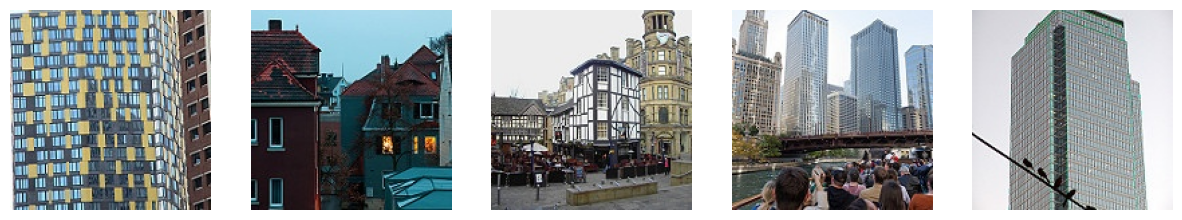

In [4]:
import os
from PIL import Image
import matplotlib.pyplot as plt

# Datasetin əsas yolunu göstəririk
data_path = os.path.join(path, "intel-image-classification/train")

# Şəkilləri yükləyəcəyimiz sinifi seçirik (məsələn, "buildings")
category = 'buildings'  # Burada kateqoriyanı dəyişə bilərsiniz
image_folder = os.path.join(data_path, category)

# İlk 5 şəkili yükləyirik
image_files = os.listdir(image_folder)[:5]  # İlk 5 şəkil

# Şəkilləri göstəririk
plt.figure(figsize=(15, 10))  # Şəkillərin ölçüsünü təyin edirik
for i, image_file in enumerate(image_files):
    image_path = os.path.join(image_folder, image_file)
    image = Image.open(image_path)

    # Şəkli subplot-da göstəririk
    plt.subplot(1, 5, i + 1)  # 1 sıra və 5 sütunlu subplot
    plt.imshow(image)
    plt.axis('off')

plt.show()

### datanin qovluqlari ve yeri


### dataset/
####    train/
-        buildings/
-        forest/
-        glacier/
-        mountain/
-        sea/
-        street/

#### validation/
-        buildings/
-        forest/
-        glacier/
-        mountain/
-        sea/
-        street/


### Train vs Test Data Preperation

In [5]:
import torch
from torch.utils.data import DataLoader
from torchvision import datasets, transforms

# Datasetin kök yolu
train_dir = path + "/intel-image-classification/train"
test_dir = path + "/intel-image-classification/validation"

# Hər iki set üçün transformasiyalar (resize, normalize və s.)
transform = transforms.Compose([
    transforms.Resize((224, 224)),  # CNN üçün ölçünü uyğunlaşdırırıq
    transforms.ToTensor(),  # Tensor formatına çeviririk
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])  # Pretrained model üçün
])

# Datasetin yüklənməsi
# ImageFolder avtomatik her qovluqda olan sekillere qovluq adina uygun label teyin edir
train_dataset = datasets.ImageFolder(root=train_dir, transform=transform)
test_dataset = datasets.ImageFolder(root=test_dir, transform=transform)

# DataLoader-ların yaradılması
train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=32, shuffle=False)

# Datasetin label-ləri (bu adlar sırasına görə etiketlənəcək)
class_names = train_dataset.classes
print("Class names:", class_names)

# Dataset ölçüləri
print("Train set size:", len(train_dataset))
print("Test set size:", len(test_dataset))

Class names: ['buildings', 'forest', 'glacier', 'mountain', 'sea', 'street']
Train set size: 6000
Test set size: 2400


### train_loader-dən bir batch şəkillər Plot olunur

In [6]:
import numpy as np
import torchvision
import matplotlib as mpl
import matplotlib.pyplot as plt

# Şəkilləri göstərmək üçün funksiya təyin edir
def imshow(image):

    # Əgər giriş `torch.Tensor` tipindədirsə, numpy array-ə çevirir və kanalları (1,2,0) şəklində düzəldir
    if isinstance(image, torch.Tensor):
        image = image.numpy().transpose((1, 2, 0))

    # Əgər giriş `torch.Tensor` deyilsə, onu numpy array-ə çevirir və kanalları düzəldir
    else:
        image = np.array(image).transpose((1, 2, 0))

    # Orta və standart sapma dəyərlərini RGB kanallarına görə müəyyən edir
    mean = np.array([0.5, 0.5, 0.5])
    std = np.array([0.5, 0.5, 0.5])
    # Şəkili orijinal formata qaytarmaq üçün normalizasiya dəyərlərini geri alır (inverse normalization)
    image = std * image + mean
    # Dəyərləri 0 ilə 1 arasında sıxır ki, şəkil düzgün göstərilsin
    image = np.clip(image, 0, 1)

    # Şəkili göstərmək üçün matplotlib-də qrafik obyekti yaradır
    fig, ax = plt.subplots(1, 1, figsize=(32, 32))
    # Şəkili matplotlib ilə göstərir
    plt.imshow(image)
    # Oxları gizlədir, beləliklə şəkil tam görünür
    ax.axis('off')

# `train_loader`-dən bir batch (təlim üçün bir sıra şəkillər) götürür
images, _ = next(iter(train_loader))
# 10 şəkil sırasını grid şəklində təşkil edir
out = torchvision.utils.make_grid(images, nrow=10)
# `imshow` funksiyasını çağıraraq şəkilləri göstərir
imshow(out)

Output hidden; open in https://colab.research.google.com to view.

### Hər dövr üçün alınan 'images' tensorunun ölçülərini

In [7]:

# train_loader-dən görüntü və etiketləri əldə etmək üçün dövr yaradırıq
for images, labels in train_loader:
    # Hər dövr üçün alınan 'images' tensorunun ölçülərini çap edirik
    print(images.shape)
    # İlk dövrün sonunda dövrü dayandırırıq, çünki yalnız bir partiya (batch) göstərmək istəyirik
    break

torch.Size([32, 3, 224, 224])


In [8]:
train_dataset[0][0].shape

torch.Size([3, 224, 224])

In [9]:
# !pip install timm

### Creat Model

In [10]:
import torch
import torch.nn as nn
import timm

# Inception-v4 modelini yükləyin
model = timm.create_model('inception_v4', pretrained=True)

# Son təbəqəni dəyişirik (fully connected layer)
num_ftrs = model.get_classifier().in_features  # get_classifier() çıxış qatını almaq üçün istifadə edilir
model.classifier = nn.Linear(num_ftrs, len(class_names))  # `len(class_names)` sizin etiket sayınızdır

# Modeli cihazınıza (GPU/CPU) yükləyin
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
model = model.to(device)

# Modelin strukturu
print(model)

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:89: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


model.safetensors:   0%|          | 0.00/171M [00:00<?, ?B/s]

InceptionV4(
  (features): Sequential(
    (0): ConvNormAct(
      (conv): Conv2d(3, 32, kernel_size=(3, 3), stride=(2, 2), bias=False)
      (bn): BatchNormAct2d(
        32, eps=0.001, momentum=0.1, affine=True, track_running_stats=True
        (drop): Identity()
        (act): ReLU(inplace=True)
      )
    )
    (1): ConvNormAct(
      (conv): Conv2d(32, 32, kernel_size=(3, 3), stride=(1, 1), bias=False)
      (bn): BatchNormAct2d(
        32, eps=0.001, momentum=0.1, affine=True, track_running_stats=True
        (drop): Identity()
        (act): ReLU(inplace=True)
      )
    )
    (2): ConvNormAct(
      (conv): Conv2d(32, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn): BatchNormAct2d(
        64, eps=0.001, momentum=0.1, affine=True, track_running_stats=True
        (drop): Identity()
        (act): ReLU(inplace=True)
      )
    )
    (3): Mixed3a(
      (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
      (c

### Count Paramteres in Model

In [11]:
# Modeldəki parametrlərin sayını hesablayan funksiyanı təyin edirik
def count_parameters(model):
    """Count the number of parameters in a model."""
    # Ümumi parametr sayını saxlamaq üçün `total_params` dəyişənini 0-a bərabər edirik
    total_params = 0
    # Modelin bütün parametrlərini tək-tək gəzirik
    for param in model.parameters():
        # Hər parametrin element sayını `total_params`-a əlavə edirik
        total_params += param.numel()
    # Ümumi parametr sayını geri qaytarırıq
    return total_params

# ConvNet sinfinə əsasən bir model nümunəsi yaradırıq
conv_net = model
# `count_parameters` funksiyasını çağıraraq `conv_net` modelindəki parametr sayını hesablayırıq
num_params = count_parameters(conv_net)
# Ümumi parametr sayını ekranda çap edirik
print(num_params)

42689038


In [12]:
# !pip install torchsummary

In [13]:
from torchsummary import summary

summary(model, input_size= (3, 224, 224))

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1         [-1, 32, 111, 111]             864
          Identity-2         [-1, 32, 111, 111]               0
              ReLU-3         [-1, 32, 111, 111]               0
    BatchNormAct2d-4         [-1, 32, 111, 111]              64
       ConvNormAct-5         [-1, 32, 111, 111]               0
            Conv2d-6         [-1, 32, 109, 109]           9,216
          Identity-7         [-1, 32, 109, 109]               0
              ReLU-8         [-1, 32, 109, 109]               0
    BatchNormAct2d-9         [-1, 32, 109, 109]              64
      ConvNormAct-10         [-1, 32, 109, 109]               0
           Conv2d-11         [-1, 64, 109, 109]          18,432
         Identity-12         [-1, 64, 109, 109]               0
             ReLU-13         [-1, 64, 109, 109]               0
   BatchNormAct2d-14         [-1, 64, 1

### CrossEntropyLoss vs Optimzation

In [14]:
import torch.optim as optim
import torch.nn as nn

# Loss and optimizer

#loss function for defining if we  predicted right or wronge
# Modelin səhvini ölçmək üçün istifadə olunur, çoxlu sinifli təsnifat üçün uyğun itki funksiyasıdır
criterion = nn.CrossEntropyLoss()

# optimisation function for creating gradient decent and learning
# Modelin parametrlərini optimallaşdırmaq üçün Adam optimallaşdırıcısını istifadə edir,
#                                                                         təlim sürətini learning_rate ilə tənzimləyir
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)

### Train stage

In [15]:
# Modelin təlimi
epochs = 10  # Təlim dövr sayını təyin edin
for epoch in range(epochs):
    model.train()
    running_loss = 0.0
    correct = 0
    total = 0
    for images, labels in train_loader:
        images, labels = images.to(device), labels.to(device)

        optimizer.zero_grad()  # Optimizerın grad-larını sıfırlayırıq
        outputs = model(images)
        loss = criterion(outputs, labels)  # Hədəf və modelin çıxışı arasındakı itki
        loss.backward()  # Grad-ları geri yayırıq
        optimizer.step()  # Optimizer bir addım irəliləyir

        running_loss += loss.item()
        _, predicted = torch.max(outputs, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

    print(f"Epoch [{epoch+1}/{epochs}], Loss: {running_loss/len(train_loader):.4f}, Accuracy: {100 * correct/total:.2f}%")

Epoch [1/10], Loss: 0.7618, Accuracy: 77.57%
Epoch [2/10], Loss: 0.4203, Accuracy: 85.27%
Epoch [3/10], Loss: 0.3444, Accuracy: 88.48%
Epoch [4/10], Loss: 0.3044, Accuracy: 89.63%
Epoch [5/10], Loss: 0.2794, Accuracy: 90.05%
Epoch [6/10], Loss: 0.2474, Accuracy: 91.75%
Epoch [7/10], Loss: 0.2263, Accuracy: 92.83%
Epoch [8/10], Loss: 0.2301, Accuracy: 92.67%
Epoch [9/10], Loss: 0.1913, Accuracy: 93.35%
Epoch [10/10], Loss: 0.1668, Accuracy: 94.30%


### Evolution stage

In [18]:

model.eval()  # Modeli qiymətləndirmə rejiminə keçiririk
correct = 0
total = 0
with torch.no_grad():
    for images, labels in test_loader:
        images, labels = images.to(device), labels.to(device)
        outputs = model(images)
        _, predicted = torch.max(outputs, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

print(f"Validation Accuracy: {100 * correct/total:.2f}%")

Validation Accuracy: 84.67%


### Pictures Plot which Model can not learning

In [65]:
import random  # Təsadüfi nümunə götürmək üçün random modulunu idxal edirik
import torch  # Model əməliyyatları və tensorların idarə olunması üçün PyTorch-u idxal edirik
import matplotlib.pyplot as plt  # Vizualizasiya üçün Matplotlib-i idxal edirik
 # Şəkilləri şəbəkə formatında düzəltmək üçün torchvision-un utils modulunu idxal edirik
import torchvision.utils as utils

def plot_random_predictions(num_images=4):
    # Test datasetindən təsadüfi şəkillər seçirik
    indices = random.sample(range(len(test_dataset)), num_images)
    images = torch.stack([test_dataset[i][0] for i in indices])  # Şəkilləri bir tensor halında yığırıq
    labels = torch.tensor([test_dataset[i][1] for i in indices])  # Hər bir şəkil üçün etiketləri alırıq

    images, labels = images.to(device), labels.to(device)

    # Modelin proqnozlarını alırıq
    # Şəkilləri modeldən keçirərək proqnozları əldə edirik və onları computation graph-dan ayırırıq
    output = model(images).data
    # Hər bir şəkil üçün proqnoz edilən sinif indekslərini torch.max ilə alırıq
    _, predictions = torch.max(output.data, 1)

    # Vizualizasiya
    plt.figure(figsize=(15, 15))  # Şəkilləri göstərmək üçün təyin edilmiş ölçüdə yeni bir şəkil (figure) yaradırıq
    # Şəkilləri şəbəkə (grid) formatında düzəldirik və göstəriş üçün ölçüləri tənzimləyirik
    images_grid = utils.make_grid(images.cpu(), nrow=4).permute(1, 2, 0)  # `.cpu()` ilə köçürdük
    plt.imshow(images_grid)  # Şəbəkə şəklində düzəldilmiş şəkilləri göstəririk
    plt.axis('off')  # Təmiz görüntü üçün oxları və etiketləri (axis) söndürürük

    # Əsl etiketləri və proqnozları çap edirik
    print(f'True Labels: {labels.cpu()}')  # Şəkillərin əsl etiketlərini çap edirik
    print(f'Predictions: {predictions.cpu()}')  # Modelin verdiyi proqnozları çap edirik

    plt.subplots_adjust(wspace=0.5, hspace=0.5)  # Alt şəkillər arasındakı boşluğu tənzimləyirik (lazım olduqda)
    plt.show()  # Şəkili (plot) ekranda göstəririk


In [66]:
class_names

['buildings', 'forest', 'glacier', 'mountain', 'sea', 'street']

True Labels: tensor([3, 4, 5, 5, 5, 0, 5, 2, 2, 3, 4, 4])
Predictions: tensor([3, 4, 5, 5, 5, 0, 5, 2, 2, 3, 4, 4])


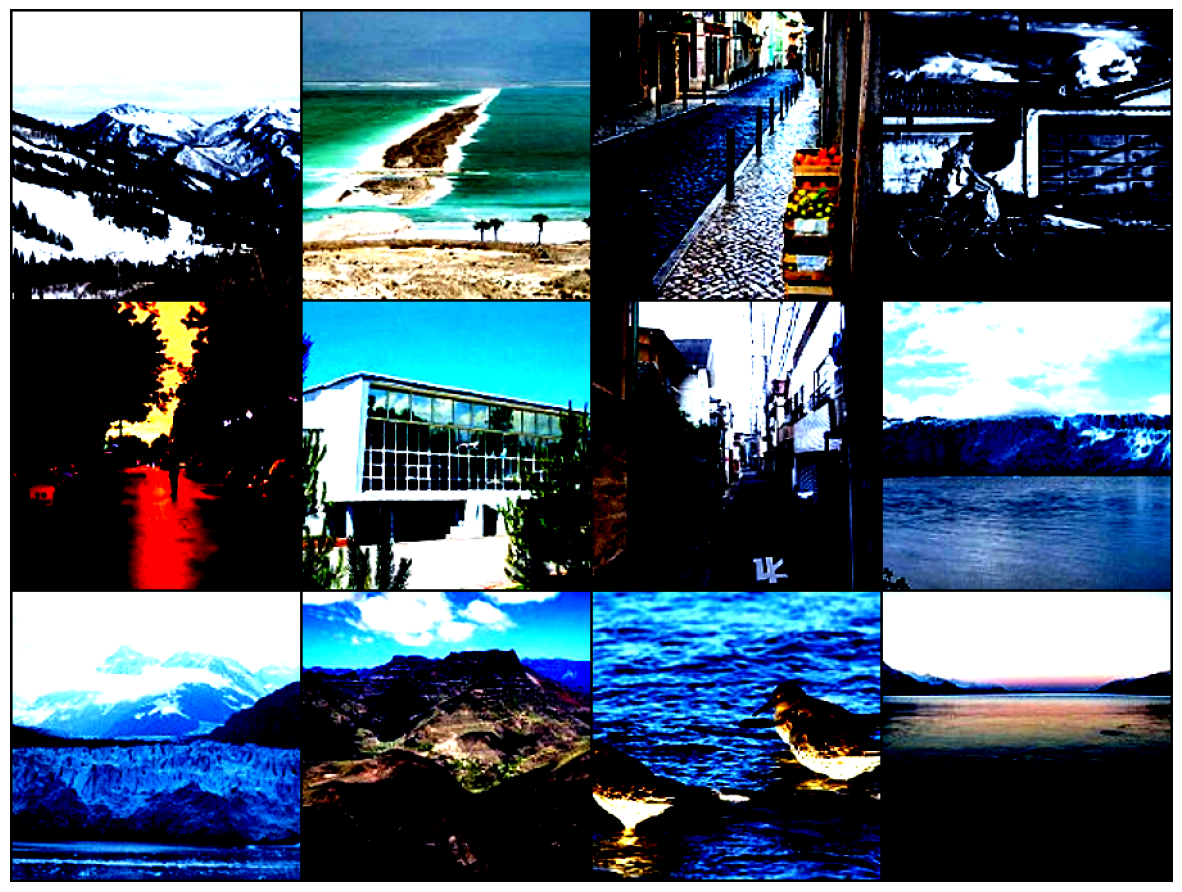

In [67]:
plot_random_predictions(num_images=12)

### Pictures Plot which Model can not learning

In [79]:
def image_plot(image, label):
    # Şəkillərin sinif adlarını saxlayan bir siyahı yaradırıq
    labels = class_names
    # Yeni bir şəkil pəncərəsi (fig) və oxlar (ax) yaradırıq və ölçüsünü (1x1) təyin edirik
    fig, ax = plt.subplots(figsize=(1, 1))
    # Şəkili `numpy` formatına çeviririk və kanal sırasını (C, H, W -> H, W, C) dəyişirik
    image = image.cpu().permute(1, 2, 0).numpy()  # Şəkili CPU-ya köçürüb numpy formatına çeviririk
    # Şəkili pəncərəyə göstərmək üçün `ax.imshow` funksiyasını istifadə edirik
    ax.imshow(image)
    # Şəkil üçün oxları gizlədirik
    ax.axis('off')
    # Şəkilin başlığını onun etiketinə görə təyin edirik
    plt.title(labels[label])
    # Şəkili ekranda göstəririk
    plt.show()

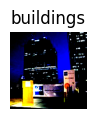

True: buildings Predicted: buildings


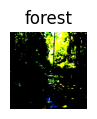

True: forest Predicted: forest


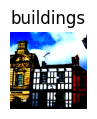

True: buildings Predicted: buildings


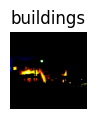

True: buildings Predicted: buildings


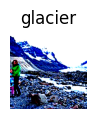

True: glacier Predicted: glacier


In [80]:
from random import randint

# Şəkillərin sinif adlarını saxlayan bir siyahı yaradırıq
labels = class_names

# 5 dəfə təkrarlanacaq bir dövr yaradırıq
for _ in range(5):
    # 1 ilə 10000 arasında təsadüfi bir indeks seçirik
    random_index = randint(1, 1000)

    # Təsadüfi indeksdən şəkil və etiket alırıq
    image = test_dataset[random_index][0].to(device)  # Şəkili GPU-ya köçürürük
    label = test_dataset[random_index][1]



    # Şəkli və etiketini göstərəcəyimiz funksiyanı çağırırıq
    image_plot(image, label)

    # Modeli qiymətləndirmə rejiminə keçiririk
    model.eval()
    # Gradientləri hesablamadan irəli ötürmə əməliyyatı üçün
    with torch.no_grad():
        # Şəkli modelə verib təxminləri alırıq
        predictions = model(image.unsqueeze(0))

    # Ən yüksək ehtimallı təxminin sinif indeksini alırıq
    _, predicted = torch.max(predictions, 1)

    # Doğru və təxmin edilən sinifləri çap edirik
    print('True:', labels[label], 'Predicted:', labels[predicted])

### Metrics

In [82]:
from sklearn.metrics import classification_report, accuracy_score, f1_score, recall_score, precision_score,\
                                                                                                    confusion_matrix

model.eval() # Modeli qiymətləndirmə rejiminə keçirir
all_labels = [] # Test dəstindəki həqiqi etiketləri saxlamaq üçün boş siyahı
all_predictions = [] # Modelin təxmin etdiyi etiketləri saxlamaq üçün boş siyahı

with torch.no_grad():
    for images, labels in test_loader:

        images, labels = images.to(device), labels.to(device)

        outputs = model(images) # Test məlumatlarını modeldən keçirir
        _, predicted = torch.max(outputs, 1) # Hər bir nümunə üçün ehtimalı ən yüksək olan sinifi seçir
        all_labels.extend(labels.cpu().numpy()) # Həqiqi etiketləri siyahıya əlavə edir
        all_predictions.extend(predicted.cpu().numpy()) # Təxminləri siyahıya əlavə edir

# Metrikləri hesablamaq
accuracy = accuracy_score(all_labels, all_predictions)
f1 = f1_score(all_labels, all_predictions, average='weighted')
recall = recall_score(all_labels, all_predictions, average='weighted')
precision = precision_score(all_labels, all_predictions, average='weighted')
conf_matrix = confusion_matrix(all_labels, all_predictions)

print(f'Accuracy: {accuracy * 100:.2f}%')
print(f'F1 Score: {f1:.2f}')
print(f'Recall: {recall:.2f}')
print(f'Precision: {precision:.2f}')
print("Confusion Matrix:\n", conf_matrix)
print("\nClassification Report:\n", classification_report(all_labels, all_predictions))

Accuracy: 84.67%
F1 Score: 0.85
Recall: 0.85
Precision: 0.87
Confusion Matrix:
 [[370   2   4   2   3  19]
 [  3 381  15   0   0   1]
 [  3   3 361  26   7   0]
 [  1   3  97 293   6   0]
 [  4   2  95  11 286   2]
 [ 50   2   5   1   1 341]]

Classification Report:
               precision    recall  f1-score   support

           0       0.86      0.93      0.89       400
           1       0.97      0.95      0.96       400
           2       0.63      0.90      0.74       400
           3       0.88      0.73      0.80       400
           4       0.94      0.71      0.81       400
           5       0.94      0.85      0.89       400

    accuracy                           0.85      2400
   macro avg       0.87      0.85      0.85      2400
weighted avg       0.87      0.85      0.85      2400



### Sekili komputerden Colab-a yuklemek methodu

In [84]:

from google.colab import files
uploaded = files.upload()

Saving street.jpg to street.jpg


### Forecast

In [85]:

from PIL import Image
import torchvision.transforms as transforms
import torch

# FashionMNIST sinif adları
class_names = train_dataset.classes

# Şəkli yükləyin və modelin gözlədiyi ölçüyə və formata çevirin
image_path = r'street.jpg'
image = Image.open(image_path).convert("RGB")  # 3 kanal (RGB) formatına çevir

# Transformasiyanı tətbiq et
transform = transforms.Compose([
    transforms.Resize((224, 224)),  # Modelin gözlədiyi ölçüyə çevirir
    transforms.ToTensor(),          # Tensora çevirir
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])  # Normalizasiya (pretrained model üçün)
])

# Şəkli tensora çevir və batch ölçüsünü (1, 3, 224, 224) kimi göstər
image_tensor = transform(image).unsqueeze(0)  # Batch ölçüsünü əlavə edirik (1, 3, 224, 224)

# Cihaza göndəririk (GPU və ya CPU)
image_tensor = image_tensor.to(device)

# Modeli qiymətləndirmək (eval mode)
model.eval()

# Modelin proqnozunu alın
with torch.no_grad():
    output = model(image_tensor)  # Şəkli modeldən keçiririk
    _, predicted_class = torch.max(output, 1)  # Ehtimalı ən yüksək olan sinifi seçirik

# Proqnoz nəticəsini sinif adı ilə göstər
predicted_class_name = class_names[predicted_class.item()]
print(f"Modelin proqnozu: Sinif: {predicted_class.item()} ; Adı: {predicted_class_name}")

Modelin proqnozu: Sinif: 5 ; Adı: street


### Check Forecast

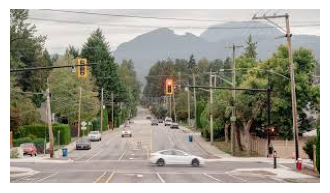

In [86]:
from PIL import Image
import matplotlib.pyplot as plt

# Şəkili açın və göstərmək üçün plt.imshow funksiyasına verin
image_path = r"street.jpg"
image = Image.open(image_path)

plt.figure(figsize=(4,4))
plt.imshow(image)
plt.axis("off")  # Oxları gizlətmək üçün
plt.show()